In [1]:
import datetime
import random

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from gymnasium.wrappers import RecordVideo

from stable_baselines3 import DQN

# Only work with scipy 1.12.0
# https://discourse.pymc.io/t/importerror-cannot-import-name-gaussian-from-scipy-signal/14170/3
from scipy.signal import convolve, gaussian


In [2]:
def make_env(env_name, seed=13):
    np.random.seed(seed)
    # remove time limit wrapper from environment
    env = gym.make(env_name, render_mode="rgb_array").unwrapped
    return env

c:\Users\admin\Coding\research\rl-training-2025-codes\.venv\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


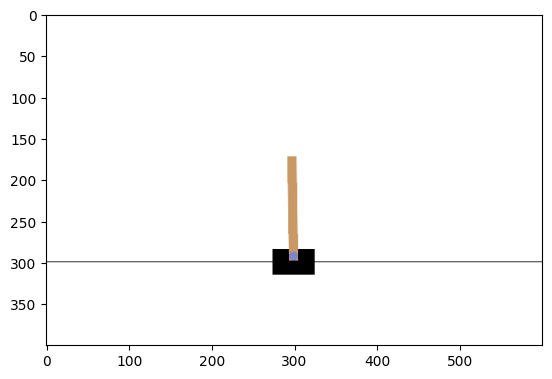

In [3]:
env_name = "CartPole-v1"

env = make_env(env_name)
env.reset()
plt.imshow(env.render())
state_shape, n_actions = env.observation_space.shape, env.action_space.n

In [ ]:
policy_kwargs = dict(activation_fn=torch.nn.ReLU, net_arch=[256, 256])

In [5]:
model = DQN("MlpPolicy", env, policy_kwargs=policy_kwargs, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [6]:
model.learn(total_timesteps=1e5, log_interval=500, progress_bar=True)

c:\Users\admin\Coding\research\rl-training-2025-codes\.venv\Lib\site-packages\rich\live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 11.4     |
|    ep_rew_mean      | 11.4     |
|    exploration_rate | 0.328    |
| time/               |          |
|    episodes         | 500      |
|    fps              | 1690     |
|    time_elapsed     | 4        |
|    total_timesteps  | 7078     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.000318 |
|    n_updates        | 1744     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 9.67     |
|    ep_rew_mean      | 9.67     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 1575     |
|    time_elapsed     | 7        |
|    total_timesteps  | 12121    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.0197   |
|    n_updates      

In [ ]:
model.predict([0, 1, 1, 1], deterministic=True)

(array(0, dtype=int64), None)

In [13]:
env.close()
env = gym.make("CartPole-v1", render_mode="rgb_array")
timestamp = int(datetime.datetime.now().timestamp())
timestamp = int(datetime.datetime.now().timestamp())
env = RecordVideo(env=env, video_folder="./video", name_prefix=timestamp)
state, _ = env.reset()
reward = 0
while True:
    action, _ = model.predict(state)
    state, r, done, _, _ = env.step(action)
    reward += r
    if done:
        print("Got reward: {}".format(reward))
        break


env.close()

Got reward: 232.0
